# Handling text (Session 01.02)

Main contents covered:

  * Normalization
  * Tokenization
  * Type/token distinction
  * Zipf's Law of Abbreviation
  
To distill information from textual data, chances are that you need to pre-process it first. 


In [1]:
### This snippet reads in a text from a URL ###

import urllib.request #for opening/reading URLs
book_url = 'https://www.gutenberg.org/cache/epub/1727/pg1727.txt' #URL of book we want to read in

book_text = urllib.request.urlopen(book_url) #open URL as "book_text"
book_text = book_text.read()                 #returns all bytes from "book_text" 
book_text = book_text.decode("utf-8")        #decode as UTF-8

In [2]:
print(len(book_text))

710229


In [3]:
print(book_text[1:10])

The Proje


In [4]:
print(book_text[1:500])

The Project Gutenberg eBook of The Odyssey, by Homer

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this e


# Pre-processing 

Let's start with the question how many times each word appears in the text.

<div class="alert alert-block alert-info"> <b>Discussion.</b> Minimally, what do we need to do with "book_text" before answering this question?</div>

## Tokenization

In [5]:
word_tokenized_book = book_text.split(' ') #list with elements of "book_text", split at the specified string

In [6]:
len(word_tokenized_book)

122218

In [7]:
word_tokenized_book[1:5]

['Project', 'Gutenberg', 'eBook', 'of']

In [8]:
len(set(word_tokenized_book))

20721

<div class="alert alert-block alert-info"> <b>Discussion.</b> Can you think of other units of analysis than word-level tokenization?</div>


<div class="alert alert-block alert-info"> <b>Discussion.</b> Can we now answer the question how many times each word appears in the text?</div>


In [9]:
from collections import Counter

freq_book = Counter(word_tokenized_book)
freq_book.most_common(5)

[('the', 5679), ('and', 4545), ('of', 3166), ('to', 3121), ('a', 1765)]

## Normalization

In [10]:
word_tokenized_normed_book = [w.lower() for w in word_tokenized_book]
freq_book = Counter(word_tokenized_normed_book)
freq_book.most_common(5)

[('the', 5912), ('and', 4587), ('of', 3193), ('to', 3153), ('a', 1795)]

<div class="alert alert-block alert-info"> <b>Discussion.</b> Look at the tokenized book. What other normalization processes can you think of?</div>

## Types vs. tokens

*Types* are the distinct units in a corpus (e.g., distinct words). *Tokens* are each occurence of a unit in a corpus (e.g., each word). So the number of *types* in a corpus will be equal or less than the number of *tokens*

<div class="alert alert-block alert-success"> <b>Activity.</b> How many word types are there in The Odyssey? How many word tokens?</div>


# The NLP pipeline & common tasks

![](spacy-pipeline.svg "Spacy pipeline")
<br>
<div style="text-align: right"> https://spacy.io/usage/processing-pipelines </div>


### Some common tasks

  * Label prediction
  * Q&A
  * Information extraction
  * Summarization
  * Machine translation
  * Image captioning
  * Text generation
  * ...

***

# spaCy

State of the art NLP module, interfaces with deep learning techniques and symbolic ones.

See __[https://spacy.io/](https://spacy.io/)__

In [11]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

doc = nlp(book_text)
# all tokens that arent stop words or punctuations
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]

# noun tokens that arent stop words or punctuations
nouns = [token.text
         for token in doc
         if (not token.is_stop and
             not token.is_punct and
             token.pos_ == "NOUN")]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common(5)

# five most common noun tokens
noun_freq = Counter(nouns)
common_nouns = noun_freq.most_common(5)

In [12]:
common_words

[('\r\n', 9219),
 ('\r\n\r\n', 1290),
 ('Ulysses', 635),
 ('said', 483),
 ('house', 408)]

In [13]:
common_nouns

[('house', 406), ('man', 345), ('men', 327), ('son', 272), ('suitors', 241)]

<div class="alert alert-block alert-success"> You can introduce spaCy to the group next week for participation credit.</div>

## Excursion: Zipf's Law of Abbreviation



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

df = pd.DataFrame.from_records(list(dict(Counter(words)).items()), columns=['word','frequency'])

In [15]:
df

,word,frequency
0,﻿The,1
1,Project,84
2,Gutenberg,84
3,eBook,11
4,Odyssey,68
...,...,...
8294,facility,1
8295,produce,1
8296,subscribe,1
8297,email,1


In [16]:
df = df.sort_values(by=['frequency'], ascending=False)
df['rank'] = list(range(1, len(df) + 1))

df

,word,frequency,rank
10,\r\n,9219,1
6,\r\n\r\n,1290,2
141,Ulysses,635,3
906,said,483,4
233,house,408,5
...,...,...,...
4852,Chloris,1,8295
4853,priceless,1,8296
4855,Minyan,1,8297
4857,Chromius,1,8298


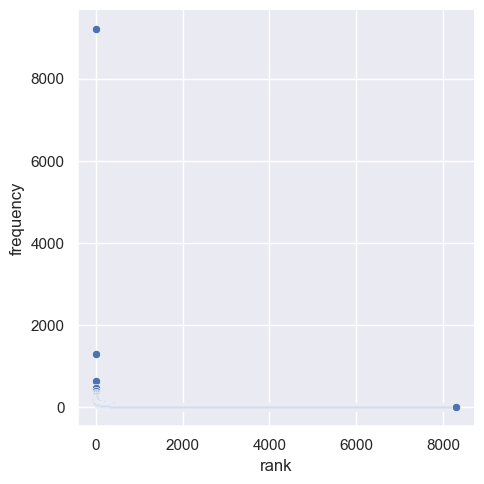

In [17]:
sns.relplot(x="rank", y="frequency", data=df);
plt.show()
plt.close()

In [18]:
# Drop first row from data frame
df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)

# Drop first row from data frame
df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)

# re-do rank with new elements
df['rank'] = list(range(1, len(df) + 1)) 
df

,word,frequency,rank
141,Ulysses,635,1
906,said,483,2
233,house,408,3
239,man,346,4
295,men,327,5
...,...,...,...
4852,Chloris,1,8293
4853,priceless,1,8294
4855,Minyan,1,8295
4857,Chromius,1,8296


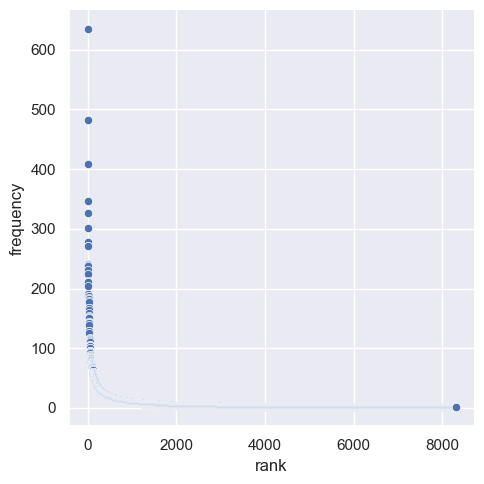

In [19]:
sns.relplot(x="rank", y="frequency", data=df);
plt.show()
plt.close()

<div class="alert alert-block alert-success"> <b>Activity.</b> Find a text that interests you.

  1. Load it
  2. Tokenize it  (what is the unit of analysis you are interested in?)
  3. Normalize it (what pre-processing is required?)
  4. Diagnose it  (what is still outstanding?)
</div>

If you cannot think of anything, here's a collection of tweets by Donald Trump. Answer the following questions about it:

  * What is the most frequent word tweeted by D. Trump?
      
  * What city does he mention most often?

In [20]:
df_trump = pd.read_csv('https://raw.githubusercontent.com/ecdedios/into-heart-of-darkness/master/trump_20200530_clean.csv')
df_trump = df_trump.head(1000) #just the first 1000 tweets for ease of processing 

In [21]:
tweets = ' '.join(list(df_trump['tweet']))

doc = nlp(tweets)
# all tokens that arent stop words or punctuations
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]
word_freq = Counter(words)

In [22]:
trump_freq_df = pd.DataFrame.from_records(list(dict(word_freq).items()), columns=['word','frequency'])
trump_freq_df = trump_freq_df.sort_values(by=['frequency'], ascending=False)

In [23]:
trump_freq_df

,word,frequency
1673,RT,412
82,amp,136
2000,@realDonaldTrump,82
96,great,72
18,people,70
...,...,...
2301,HARD,1
2302,https://t.co/NytV20gopi,1
2303,dealing,1
2304,expensive,1
